## README
- Statistics for GS and CS trend

In [1]:
import pandas as pd

In [2]:
data_base_dir = "C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate"

data_GS_dir = f"{data_base_dir}/GS_cleaned"
data_CS_dir = f"{data_base_dir}/CS_cleaned"

GS_data_set = {}
CS_data_set = {}

for year in range(2013, 2026):
    GS_data_set[year] = pd.read_parquet(f"{data_GS_dir}/GS_data_{year}.parquet")
    print(f"GS data for {year} loaded, Length: {len(GS_data_set[year])}")
print()
for year in range(2015, 2026):
    CS_data_set[year] = pd.read_parquet(f"{data_CS_dir}/CS_data_{year}.parquet")
    print(f"CS data for {year} loaded, Length: {len(CS_data_set[year])}")

GS data for 2013 loaded, Length: 101591
GS data for 2014 loaded, Length: 104327
GS data for 2015 loaded, Length: 118011
GS data for 2016 loaded, Length: 119393
GS data for 2017 loaded, Length: 118441
GS data for 2018 loaded, Length: 107083
GS data for 2019 loaded, Length: 113338
GS data for 2020 loaded, Length: 119894
GS data for 2021 loaded, Length: 121506
GS data for 2022 loaded, Length: 110988
GS data for 2023 loaded, Length: 118521
GS data for 2024 loaded, Length: 118537
GS data for 2025 loaded, Length: 107468

CS data for 2015 loaded, Length: 1856
CS data for 2016 loaded, Length: 1909
CS data for 2017 loaded, Length: 4252
CS data for 2018 loaded, Length: 33552
CS data for 2019 loaded, Length: 56661
CS data for 2020 loaded, Length: 72863
CS data for 2021 loaded, Length: 93370
CS data for 2022 loaded, Length: 97896
CS data for 2023 loaded, Length: 119790
CS data for 2024 loaded, Length: 184763
CS data for 2025 loaded, Length: 225258


In [3]:
del GS_data_set[2025]
del CS_data_set[2025]

In [4]:
# Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

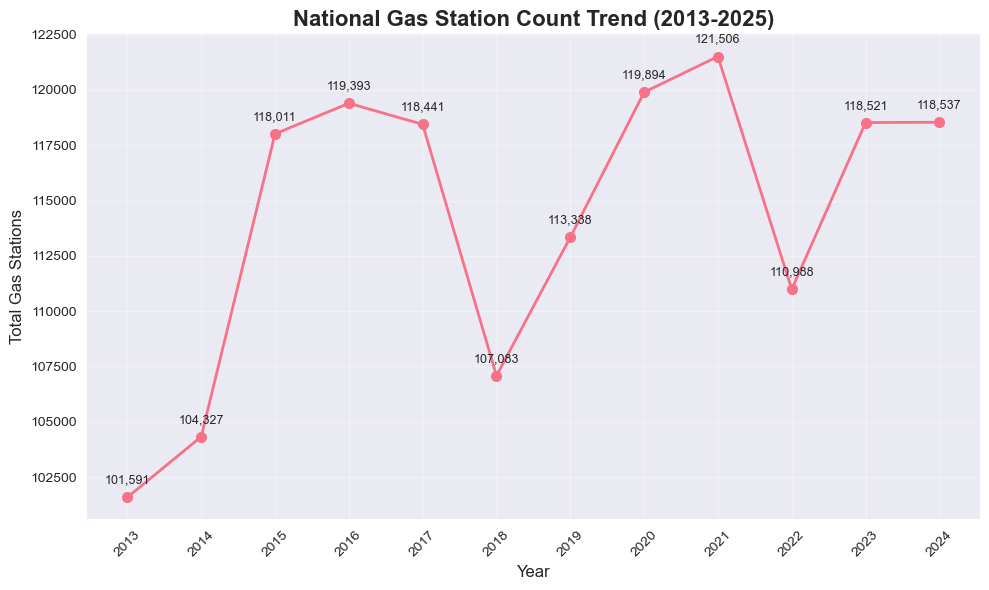

In [5]:
# Calculate national GS total count by year
national_gs_counts = {}
for year, data in GS_data_set.items():
    national_gs_counts[year] = len(data)

# Plot national GS trend
plt.figure(figsize=(10, 6))
years = list(national_gs_counts.keys())
counts = list(national_gs_counts.values())

plt.plot(years, counts, marker='o', linewidth=2, markersize=8)
plt.title('National Gas Station Count Trend (2013-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Gas Stations', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(years, rotation=45)

# Add value labels on points
for year, count in zip(years, counts):
    plt.annotate(f'{count:,}', (year, count), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

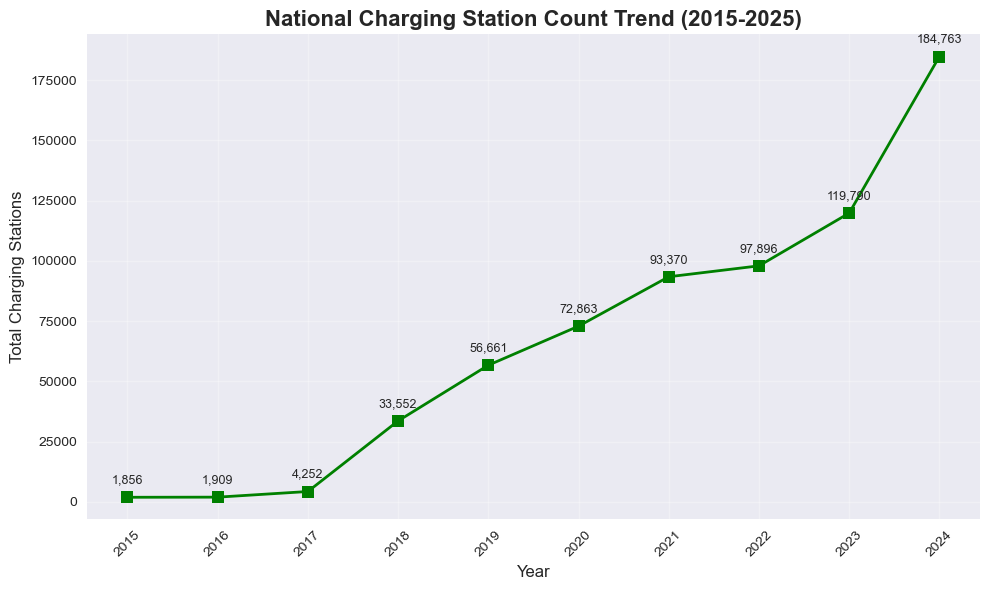

In [6]:
# Calculate national CS total count by year
national_cs_counts = {}
for year, data in CS_data_set.items():
    national_cs_counts[year] = len(data)

# Plot national CS trend
plt.figure(figsize=(10, 6))
years = list(national_cs_counts.keys())
counts = list(national_cs_counts.values())

plt.plot(years, counts, marker='s', linewidth=2, markersize=8, color='green')
plt.title('National Charging Station Count Trend (2015-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Charging Stations', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(years, rotation=45)

# Add value labels on points
for year, count in zip(years, counts):
    plt.annotate(f'{count:,}', (year, count), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [7]:
# Calculate GS count by province and year
gs_province_data = {}
for year, data in GS_data_set.items():
    gs_province_data[year] = data.groupby('pname_EN').size().to_dict()

# Get all unique provinces
all_provinces_gs = set()
for year_data in gs_province_data.values():
    all_provinces_gs.update(year_data.keys())

# Create dataframe for easier plotting
gs_df_list = []
for year in sorted(gs_province_data.keys()):
    for province in all_provinces_gs:
        count = gs_province_data[year].get(province, 0)
        gs_df_list.append({'Year': year, 'Province': province, 'Count': count})

gs_trend_df = pd.DataFrame(gs_df_list)

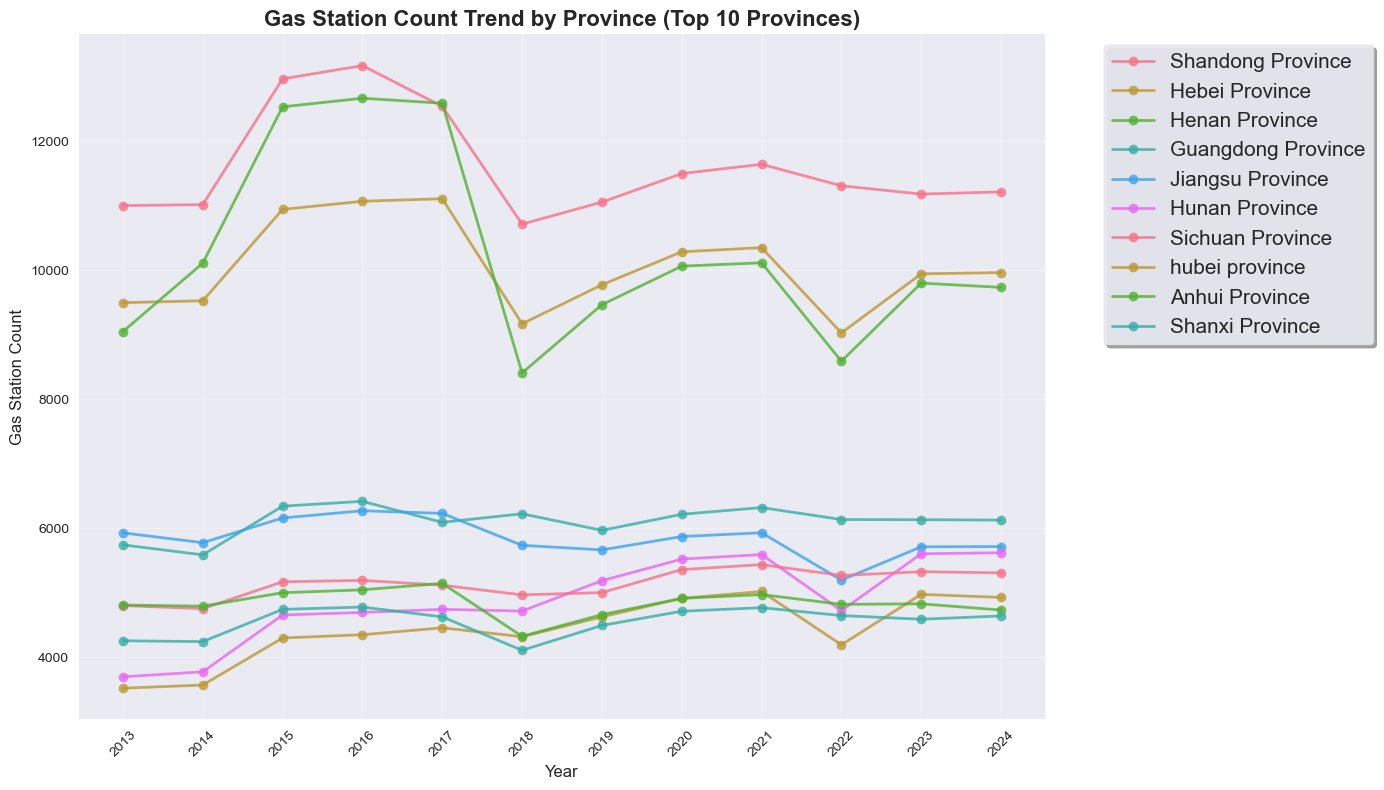

In [8]:
# Plot GS trend by province (top 10 provinces by latest year count)
latest_year_gs = max(GS_data_set.keys())
top_provinces_gs = GS_data_set[latest_year_gs].groupby('pname_EN').size().nlargest(10).index.tolist()

plt.figure(figsize=(14, 8))
for province in top_provinces_gs:
    province_data = gs_trend_df[gs_trend_df['Province'] == province]
    plt.plot(province_data['Year'], province_data['Count'], 
             marker='o', linewidth=2, label=province, alpha=0.8)

plt.title('Gas Station Count Trend by Province (Top 10 Provinces)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gas Station Count', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, 
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(GS_data_set.keys()), rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Calculate CS count by province and year
cs_province_data = {}
for year, data in CS_data_set.items():
    cs_province_data[year] = data.groupby('pname_EN').size().to_dict()

# Get all unique provinces
all_provinces_cs = set()
for year_data in cs_province_data.values():
    all_provinces_cs.update(year_data.keys())

# Create dataframe for easier plotting
cs_df_list = []
for year in sorted(cs_province_data.keys()):
    for province in all_provinces_cs:
        count = cs_province_data[year].get(province, 0)
        cs_df_list.append({'Year': year, 'Province': province, 'Count': count})

cs_trend_df = pd.DataFrame(cs_df_list)

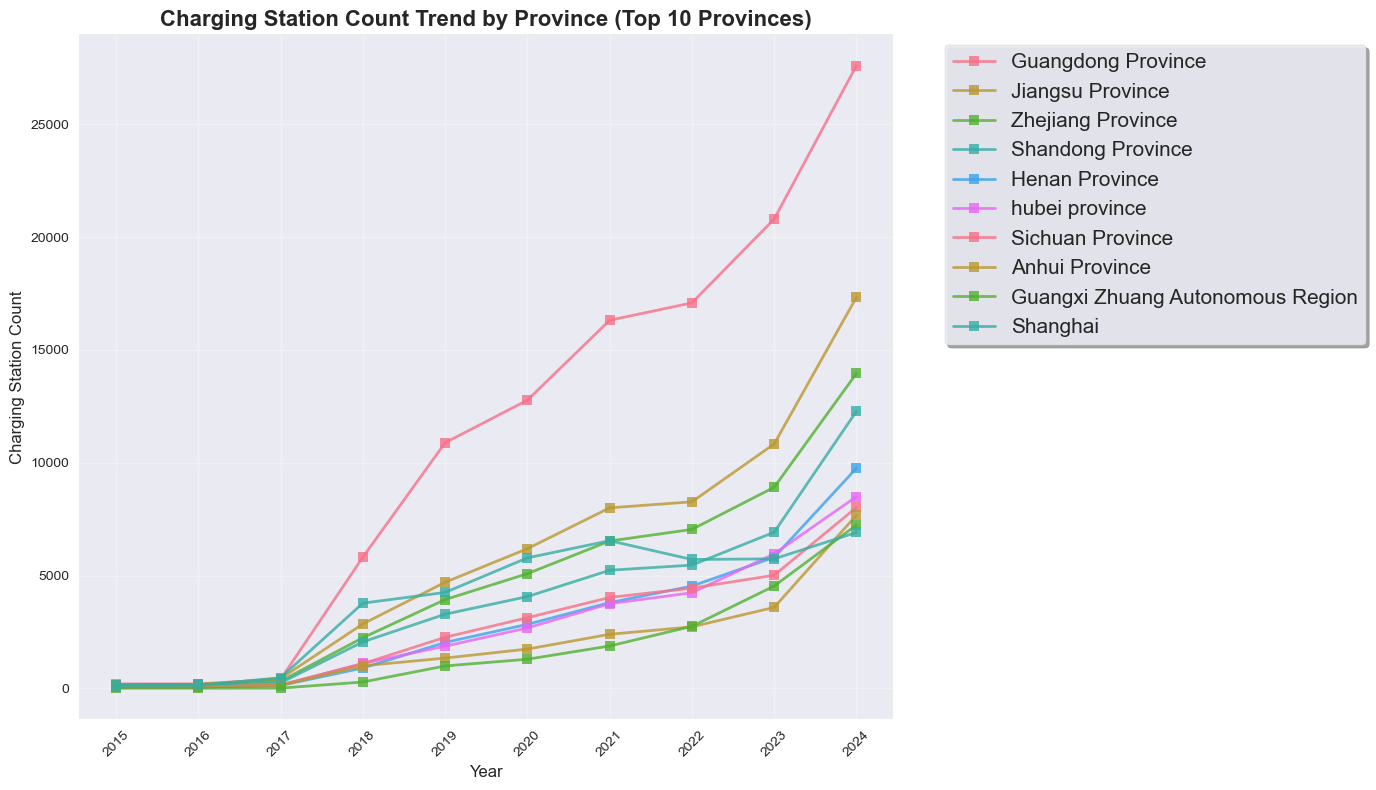

In [10]:
# Plot CS trend by province (top 10 provinces by latest year count)
latest_year_cs = max(CS_data_set.keys())
top_provinces_cs = CS_data_set[latest_year_cs].groupby('pname_EN').size().nlargest(10).index.tolist()

plt.figure(figsize=(14, 8))
for province in top_provinces_cs:
    province_data = cs_trend_df[cs_trend_df['Province'] == province]
    plt.plot(province_data['Year'], province_data['Count'], 
             marker='s', linewidth=2, label=province, alpha=0.8)

plt.title('Charging Station Count Trend by Province (Top 10 Provinces)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Charging Station Count', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15,
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(CS_data_set.keys()), rotation=45)
plt.tight_layout()
plt.show()

In [11]:
GS_data_set[2022][GS_data_set[2022]["pname_EN"] == "Shaanxi Province"]

,id,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN,corporation
311,262c9733-7c6f-3820-ab0f-24df9ab6f4e3,铺河加油站(铺河站),关庙镇派出所斜对面,109.080999,32.718071,[],陕西省,安康市,汉滨区,汽车服务,加油站,加油站,Shaanxi Province,Ankang City,Other
312,13113c39-4dff-3e60-8154-be0225bbcaa9,赵湾加油站,102省道和赵麻路交叉处沿102省道往南,109.159009,32.991721,0915-7563366,陕西省,安康市,旬阳市,汽车服务,加油站,加油站,Shaanxi Province,Ankang City,Other
313,02845b11-a53e-38ce-ab9b-6ca3a95fedb0,恒联加油站(暂停营业),恒口镇,108.773717,32.742143,[],陕西省,安康市,汉滨区,汽车服务,加油站,加油站,Shaanxi Province,Ankang City,Other
314,76c218d8-ea1e-3604-b9eb-f1af6040216a,汉阳加油站,汉阳镇长岭村,108.282873,32.796571,[],陕西省,安康市,汉阴县,汽车服务,加油站,加油站,Shaanxi Province,Ankang City,Other
315,fa87d113-9a7b-3b55-83cb-c21e079c7c7b,延长石油秦岭服务区加油站,秦岭服务区与G5京昆高速交叉口南120米,108.485479,33.775769,[],陕西省,安康市,宁陕县,汽车服务,加油站,加油站,Shaanxi Province,Ankang City,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85427,4c92f5d4-b322-3177-b771-51e4940d3eaa,辰丰LNG加气站,佳好佳油气加油加气站东南侧200米,110.875275,38.941502,[],陕西省,榆林市,府谷县,汽车服务,加气站,加气站,Shaanxi Province,Yulin City,Other
85428,0c44a202-1ba5-385c-8c5d-b3a1bef52dde,中国京油加油站,307国道东侧(银座国际酒店对面),107.605293,37.558744,[],陕西省,榆林市,定边县,汽车服务,加油站,加油站,Shaanxi Province,Yulin City,Other
85429,2183f15d-82aa-3474-8c27-c348f48bae9e,中国石油府谷河西城市便利加油站(暂停营业),府谷镇花石峁村盐沟路与小河川路西角,111.045804,39.041654,0912-3454177,陕西省,榆林市,府谷县,汽车服务,加油站,中国石油,Shaanxi Province,Yulin City,CNPC
85430,da8139c1-b5bf-319b-97f5-aed06550d699,顺安加油站,迎宾大道,110.678689,37.450238,[],陕西省,榆林市,吴堡县,汽车服务,加油站,加油站,Shaanxi Province,Yulin City,Other


### Check 13-14 sharp decline
- Check if there is any problem with the data

In [13]:
GS_data_set[2017]

,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,timestamp,pname_EN,cityname_EN,corporation
0,中国石油平安加油站(谊盛路),四团镇四平公路1345号,121.727891,30.901517,021-57546205;021-57546206,上海市,上海市,奉贤区,汽车服务,加油站,中国石油,20171109194523.116676+08:00,Shanghai,Shanghai,CNPC
1,中国石油加油站(天鹏街),四团镇川南奉公路8101号,121.719851,30.941888,021-57532413,上海市,上海市,奉贤区,汽车服务,加油站,中国石油,20171109194523.1227129+08:00,Shanghai,Shanghai,CNPC
2,中国石化四团加油站,四团镇新四平公路2528号,121.725402,30.946102,021-57533337,上海市,上海市,奉贤区,汽车服务,加油站,中国石化,20171109194523.1442028+08:00,Shanghai,Shanghai,CPCC
3,中国石油南芦公路加油站,南芦公路1080号,121.752034,30.958884,021-68303070;021-68303060,上海市,上海市,浦东新区,汽车服务,加油站,中国石油,20171109194523.1583738+08:00,Shanghai,Shanghai,CNPC
4,中国石化大团加油站(海港商务楼西),"南芦公路879号,南芦公路与三三公路交叉",121.732299,30.968928,021-58082237;021-58080101,上海市,上海市,浦东新区,汽车服务,加油站,中国石化,20171109194523.1972677+08:00,Shanghai,Shanghai,CPCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118436,诚泰加油站,龙南村402乡道路段路南、八五九地税分局北,134.040096,47.428785,,黑龙江省,双鸭山市,饶河县,汽车服务,加油站,加油站,20171109194606.6876762+08:00,Heilongjiang Province,Shuangyashan City,Other
118437,兴安加油站,漠洛公路,122.333310,52.945248,,黑龙江省,大兴安岭地区,漠河县,汽车服务,加油站,加油站,20171109194918.6598639+08:00,Heilongjiang Province,Daxinganling area,Other
118438,中国石油北极村加油站,漠北公路附近,122.348557,53.457805,,黑龙江省,大兴安岭地区,漠河县,汽车服务,加油站,中国石油,20171109194918.8473093+08:00,Heilongjiang Province,Daxinganling area,CNPC
118439,中国石油第十六加油站便利店,保健路97号,126.624295,45.697562,,黑龙江省,哈尔滨市,南岗区,汽车服务,加油站,中国石油,20171109195015.0332689+08:00,Heilongjiang Province,Harbin City,CNPC


In [14]:
GS_data_set[2018]

,id,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN,corporation
0,B0FFFRTA6H,中国石化加油站,008县道西50米,115.775709,34.031860,[],安徽省,亳州市,谯城区,汽车服务,加油站,中国石化,Anhui Province,Bozhou City,CPCC
1,B022E02G73,古井石化,三曹大道南50米,115.667221,33.992340,0558-5686466,安徽省,亳州市,谯城区,汽车服务,加油站,加油站,Anhui Province,Bozhou City,Other
2,B0FFHOMXNO,中国石化加油站,105国道西50米,115.724022,33.988335,0558-5079551,安徽省,亳州市,谯城区,汽车服务,加油站,中国石化,Anhui Province,Bozhou City,CPCC
3,B022E02FWP,中国石化加油站,"十八里镇311国道与009县道交叉处,郭庄路口处",115.652035,33.872143,[],安徽省,亳州市,谯城区,汽车服务,加油站,中国石化,Anhui Province,Bozhou City,CPCC
4,B022E02FWO,043乡道加油站,009县道与043乡道交叉口东50米,115.659216,33.894989,[],安徽省,亳州市,谯城区,汽车服务,加油站,加油站,Anhui Province,Bozhou City,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,B023E0Z5AA,中石化碧辟象山爵溪加油站,爵溪振瀛路7号,121.943845,29.465543,0574-65602450,浙江省,宁波市,象山县,汽车服务,加油站,中石化碧辟,Zhejiang Province,Ningbo City,CPCC
107079,B0FFL5E7GW,中国石化加油站,[],121.962724,29.198701,[],浙江省,宁波市,象山县,汽车服务,加油站,中国石化,Zhejiang Province,Ningbo City,CPCC
107080,B023E0Z5AZ,中石化碧辟象山丹石加油站,506县道(象山第二中学西北),121.940870,29.237526,0574-65955368,浙江省,宁波市,象山县,汽车服务,加油站,中石化碧辟,Zhejiang Province,Ningbo City,CPCC
107081,B0FFH5LAZ6,中石化碧辟萧山新街加油站,104国道新街镇山末址村,120.331197,30.183274,0571-82614124,浙江省,杭州市,萧山区,汽车服务,加油站,中国石化|购物服务,Zhejiang Province,Hangzhou City,CPCC


In [15]:
print(GS_data_set[2017]['pname_EN'].value_counts())
print(GS_data_set[2018]['pname_EN'].value_counts())
print(GS_data_set[2017]['corporation'].value_counts())
print(GS_data_set[2018]['corporation'].value_counts())

pname_EN
Henan Province                      12590
Shandong Province                   12541
Hebei Province                      11109
Jiangsu Province                     6231
Guangdong Province                   6092
Anhui Province                       5146
Sichuan Province                     5118
Hunan Province                       4744
Shanxi Province                      4627
hubei province                       4457
Liaoning Province                    4049
Yunnan Province                      3862
Inner Mongolia Autonomous Region     3763
Shaanxi Province                     3715
Zhejiang Province                    3676
Fujian Province                      2960
Heilongjiang Province                2946
Jiangxi Province                     2805
Guangxi Zhuang Autonomous Region     2792
Xinjiang Uygur Autonomous Region     2472
Jilin Province                       2454
Guizhou Province                     1825
Chongqing City                       1700
Gansu Province           

In [17]:
# Find provinces with highest decline from peak to 2024
province_decline = {}
gs_peak_info = {}  # Store peak year and count for each province
for province in all_provinces_gs:
    # Get province data across all years
    province_counts = [gs_province_data[year].get(province, 0) for year in sorted(GS_data_set.keys())]
    if max(province_counts) > 0:  # Avoid division by zero
        peak_count = max(province_counts)
        peak_year = sorted(GS_data_set.keys())[province_counts.index(peak_count)]
        count_2024 = gs_province_data[2024].get(province, 0)
        decline_rate = (peak_count - count_2024) / peak_count
        province_decline[province] = decline_rate
        gs_peak_info[province] = {'year': peak_year, 'count': peak_count}

# Get top 10 provinces with highest decline rates
top_decline = sorted(province_decline.items(), key=lambda x: x[1], reverse=True)[:10]
top_decline_provinces = [province for province, _ in top_decline]

print("Top 10 provinces with highest decline rates from peak to 2024:")
for i, (province, rate) in enumerate(top_decline, 1):
    peak_info = gs_peak_info[province]
    print(f"{i:2d}. {province:20s}: {rate:.2%} (Peak: {peak_info['year']}, {peak_info['count']:,} stations)")

Top 10 provinces with highest decline rates from peak to 2024:
 1. Beijing             : 25.55% (Peak: 2016, 1,401 stations)
 2. Shanghai            : 24.61% (Peak: 2016, 1,146 stations)
 3. Henan Province      : 23.15% (Peak: 2016, 12,667 stations)
 4. Shandong Province   : 14.86% (Peak: 2016, 13,173 stations)
 5. Hainan Province     : 10.77% (Peak: 2014, 622 stations)
 6. Hebei Province      : 10.31% (Peak: 2017, 11,109 stations)
 7. Jiangsu Province    : 8.85% (Peak: 2016, 6,272 stations)
 8. Anhui Province      : 8.03% (Peak: 2017, 5,146 stations)
 9. Fujian Province     : 8.00% (Peak: 2016, 3,162 stations)
10. Tianjin City        : 7.45% (Peak: 2016, 1,061 stations)


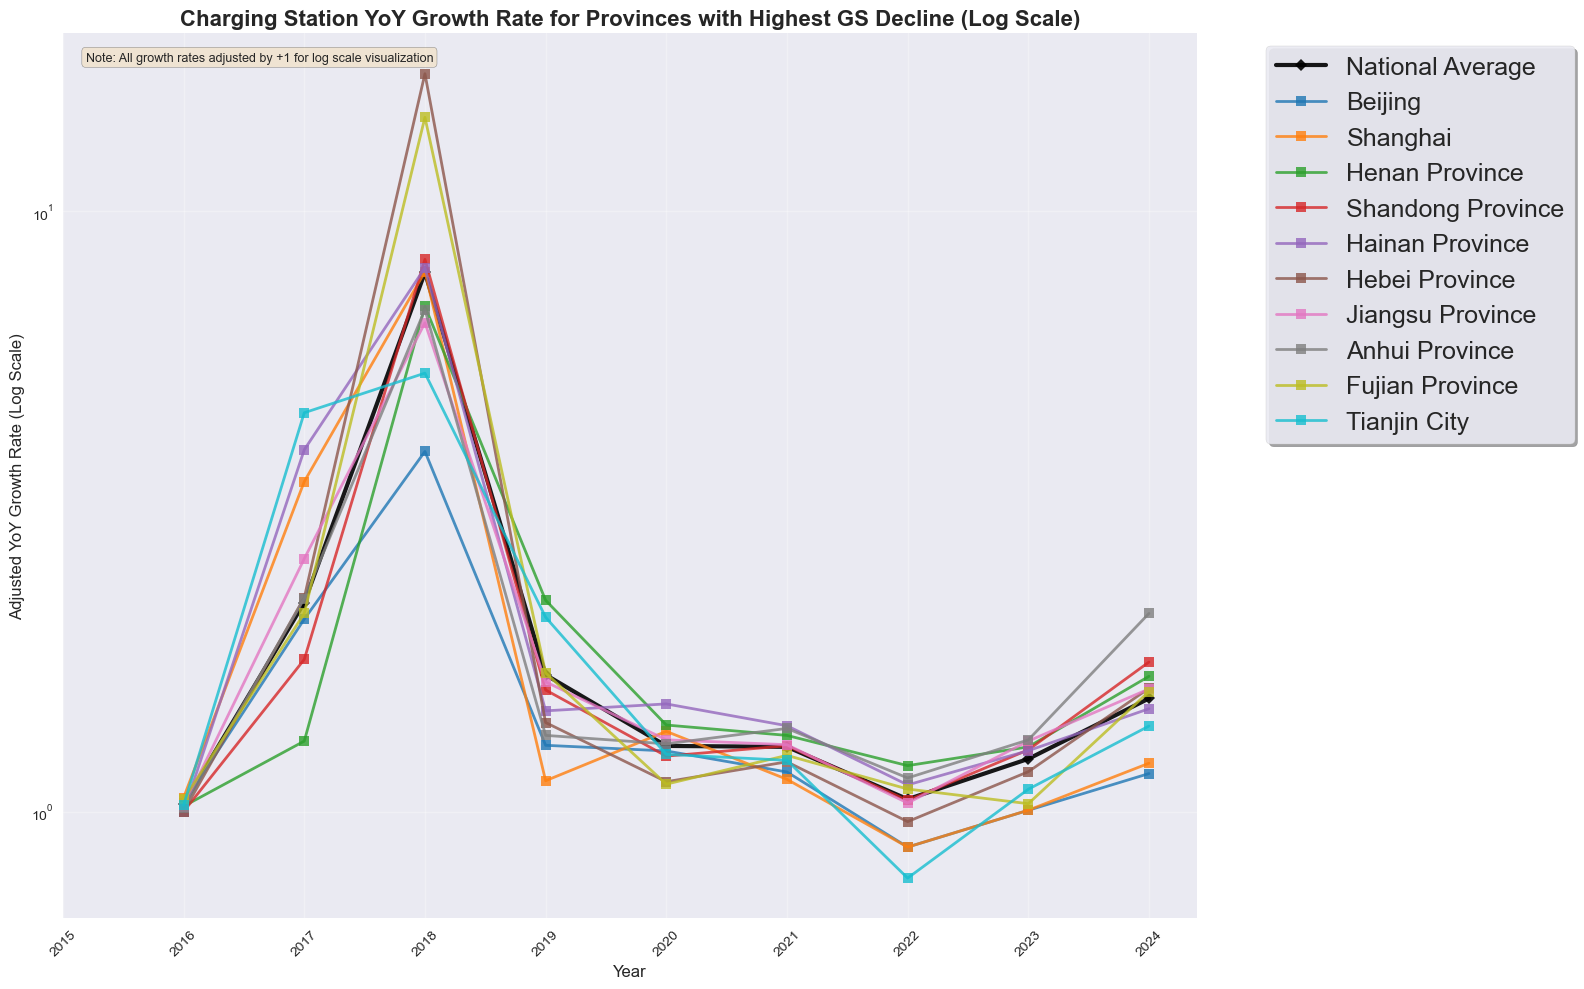

In [28]:
# Calculate national CS year-over-year growth rates
national_yoy_rates = []
national_yoy_years = []
cs_years = sorted(CS_data_set.keys())

for i in range(1, len(cs_years)):
    prev_year = cs_years[i-1]
    curr_year = cs_years[i]
    prev_count = national_cs_counts[prev_year]
    curr_count = national_cs_counts[curr_year]
    
    if prev_count > 0:  # Avoid division by zero
        yoy_rate = (curr_count - prev_count) / prev_count
        national_yoy_rates.append(yoy_rate)
        national_yoy_years.append(curr_year)

# Calculate CS year-over-year growth rates for top decline GS provinces
cs_yoy_data = {}
for province in top_decline_provinces:
    if province in all_provinces_cs:  # Check if province has CS data
        yoy_rates = []
        years_with_data = []
        
        for i in range(1, len(cs_years)):
            prev_year = cs_years[i-1]
            curr_year = cs_years[i]
            prev_count = cs_province_data[prev_year].get(province, 0)
            curr_count = cs_province_data[curr_year].get(province, 0)
            
            if prev_count > 0:  # Avoid division by zero
                yoy_rate = (curr_count - prev_count) / prev_count
                yoy_rates.append(yoy_rate)
                years_with_data.append(curr_year)
        
        if yoy_rates:  # Only store if there's data
            cs_yoy_data[province] = {'years': years_with_data, 'rates': yoy_rates}

# Plot CS year-over-year growth rates with log scale for better visualization
plt.figure(figsize=(16, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(cs_yoy_data) + 1))

# Plot national CS growth rate
adjusted_national_rates = [rate + 1 for rate in national_yoy_rates]
plt.plot(national_yoy_years, adjusted_national_rates, marker='D', linewidth=3, 
         label='National Average', alpha=0.9, color='black', markersize=6)

# Plot provincial CS growth rates
for i, (province, data) in enumerate(cs_yoy_data.items()):
    # Uniformly adjust all rates by adding 1 for log scale
    adjusted_rates = [rate + 1 for rate in data['rates']]
    plt.plot(data['years'], adjusted_rates, marker='s', linewidth=2, 
             label=province, alpha=0.8, color=colors[i])

plt.title('Charging Station YoY Growth Rate for Provinces with Highest GS Decline (Log Scale)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adjusted YoY Growth Rate (Log Scale)', fontsize=12)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18,
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(CS_data_set.keys()), rotation=45)

# Add explanation for adjusted scale
plt.text(0.02, 0.98, 'Note: All growth rates adjusted by +1 for log scale visualization', 
         transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

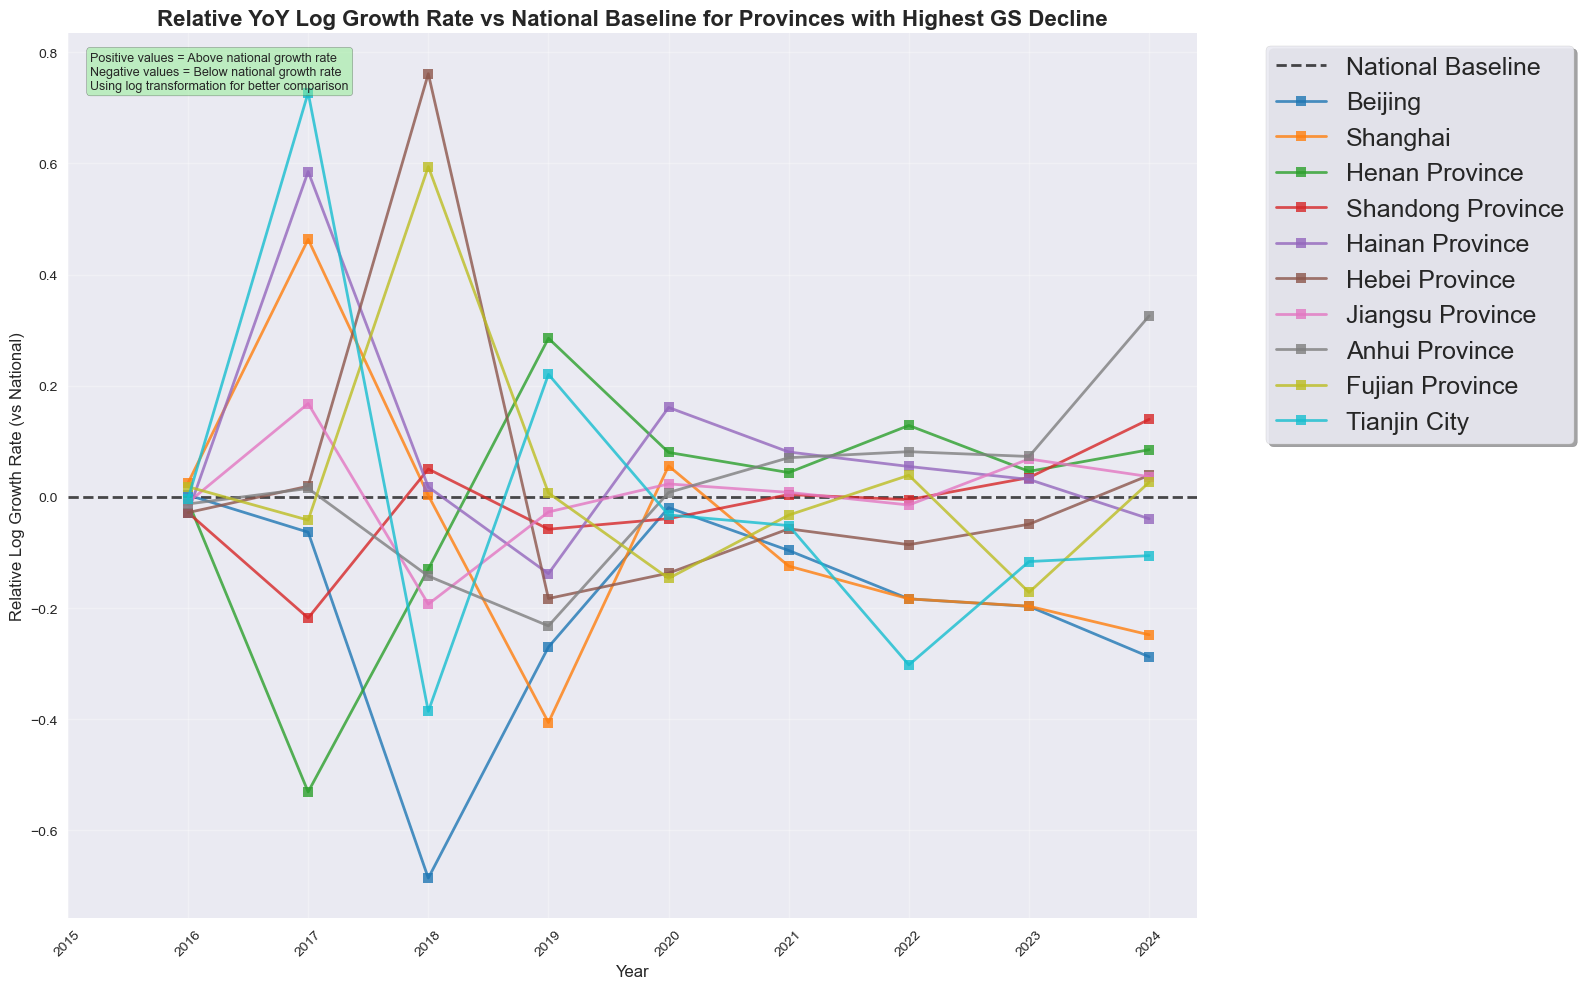

In [32]:
# Calculate relative YoY growth rates using log transformation (province - national)
plt.figure(figsize=(16, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(cs_yoy_data)))

# Plot zero reference line
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2, label='National Baseline')

# Plot provincial YoY growth rates relative to national baseline
for i, (province, data) in enumerate(cs_yoy_data.items()):
    relative_log_rates = []
    for j, year in enumerate(data['years']):
        if year in national_yoy_years:
            national_idx = national_yoy_years.index(year)
            # Calculate log of adjusted rates then subtract national baseline
            province_log_rate = np.log(data['rates'][j] + 1)
            national_log_rate = np.log(national_yoy_rates[national_idx] + 1)
            relative_rate = province_log_rate - national_log_rate
            relative_log_rates.append(relative_rate)
    
    if relative_log_rates:
        plt.plot(data['years'], relative_log_rates, marker='s', linewidth=2, 
                 label=province, alpha=0.8, color=colors[i])

plt.title('Relative YoY Log Growth Rate vs National Baseline for Provinces with Highest GS Decline', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Relative Log Growth Rate (vs National)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18,
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(CS_data_set.keys()), rotation=45)

# Add explanation
plt.text(0.02, 0.98, 'Positive values = Above national growth rate\nNegative values = Below national growth rate\nUsing log transformation for better comparison', 
         transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

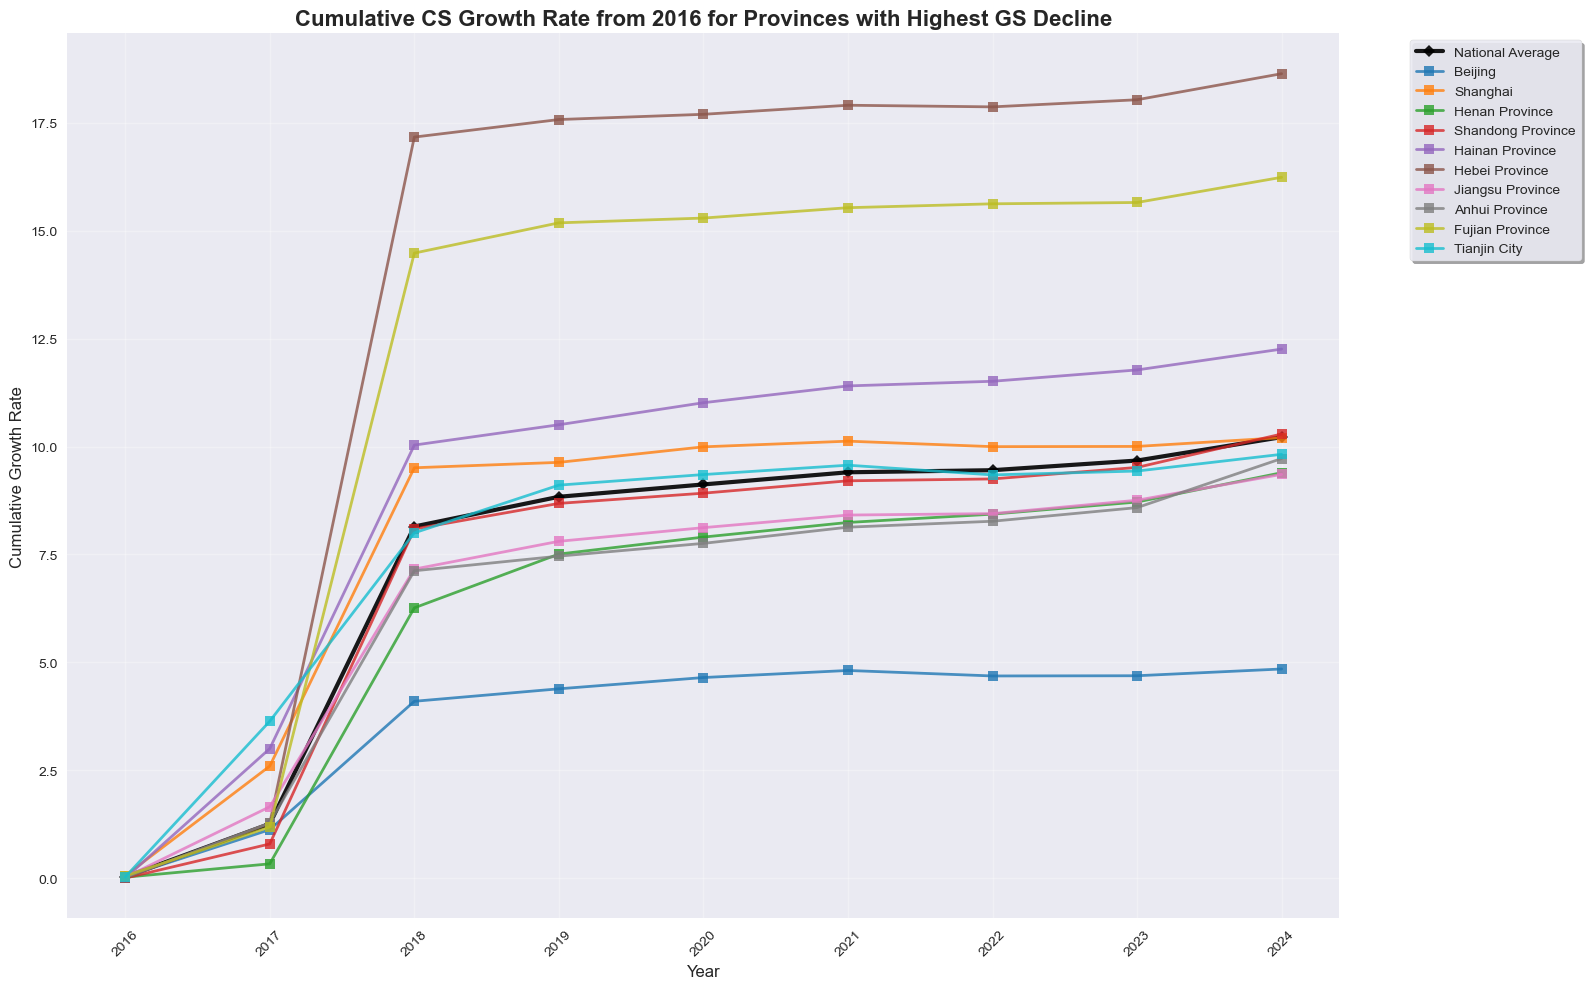

In [24]:
# Calculate cumulative growth rates starting from 2016
start_year = 2016
start_idx = national_yoy_years.index(start_year) if start_year in national_yoy_years else 0

# Calculate cumulative national growth rates
cumulative_national = []
cumulative_years = national_yoy_years[start_idx:]
cumulative_sum = 0
for rate in national_yoy_rates[start_idx:]:
    cumulative_sum += rate
    cumulative_national.append(cumulative_sum)

# Calculate cumulative provincial growth rates
cs_cumulative_data = {}
for province, data in cs_yoy_data.items():
    # Find starting index for this province
    if start_year in data['years']:
        prov_start_idx = data['years'].index(start_year)
    else:
        prov_start_idx = 0
    
    cumulative_rates = []
    cumulative_years_prov = data['years'][prov_start_idx:]
    cumulative_sum = 0
    
    for rate in data['rates'][prov_start_idx:]:
        cumulative_sum += rate
        cumulative_rates.append(cumulative_sum)
    
    if cumulative_rates:
        cs_cumulative_data[province] = {
            'years': cumulative_years_prov, 
            'cumulative': cumulative_rates
        }

# Plot cumulative growth rates
plt.figure(figsize=(16, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(cs_cumulative_data) + 1))

# Plot national cumulative growth rate
plt.plot(cumulative_years, cumulative_national, marker='D', linewidth=3, 
         label='National Average', alpha=0.9, color='black', markersize=6)

# Plot provincial cumulative growth rates
for i, (province, data) in enumerate(cs_cumulative_data.items()):
    plt.plot(data['years'], data['cumulative'], marker='s', linewidth=2, 
             label=province, alpha=0.8, color=colors[i])

plt.title(f'Cumulative CS Growth Rate from {start_year} for Provinces with Highest GS Decline', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Growth Rate', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10,
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(CS_data_set.keys())[sorted(CS_data_set.keys()).index(start_year):], rotation=45)

plt.tight_layout()
plt.show()

In [26]:
print(cs_cumulative_data)

{'Beijing': {'years': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], 'cumulative': [0.03206997084548105, 1.1224654510714698, 4.096789775395794, 4.385807116436257, 4.647215715750422, 4.810954737080409, 4.683731017403859, 4.688672339207441, 4.845402517449605]}, 'Shanghai': {'years': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], 'cumulative': [0.0546875, 2.5954282407407407, 9.50756213195413, 9.632892644910237, 9.99262008851926, 10.124121730129767, 9.996907313514006, 10.002156657346028, 10.205637945422616]}, 'Henan Province': {'years': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], 'cumulative': [0.02040816326530612, 0.33040816326530614, 6.261705873188971, 7.508401908431262, 7.901539163333223, 8.240385046514081, 8.432763495922755, 8.714006608111426, 9.393173991562312]}, 'Shandong Province': {'years': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], 'cumulative': [0.0, 0.7913669064748201, 8.088555661494901, 8.681972892859857, 8.918607157744425, 9.205514551

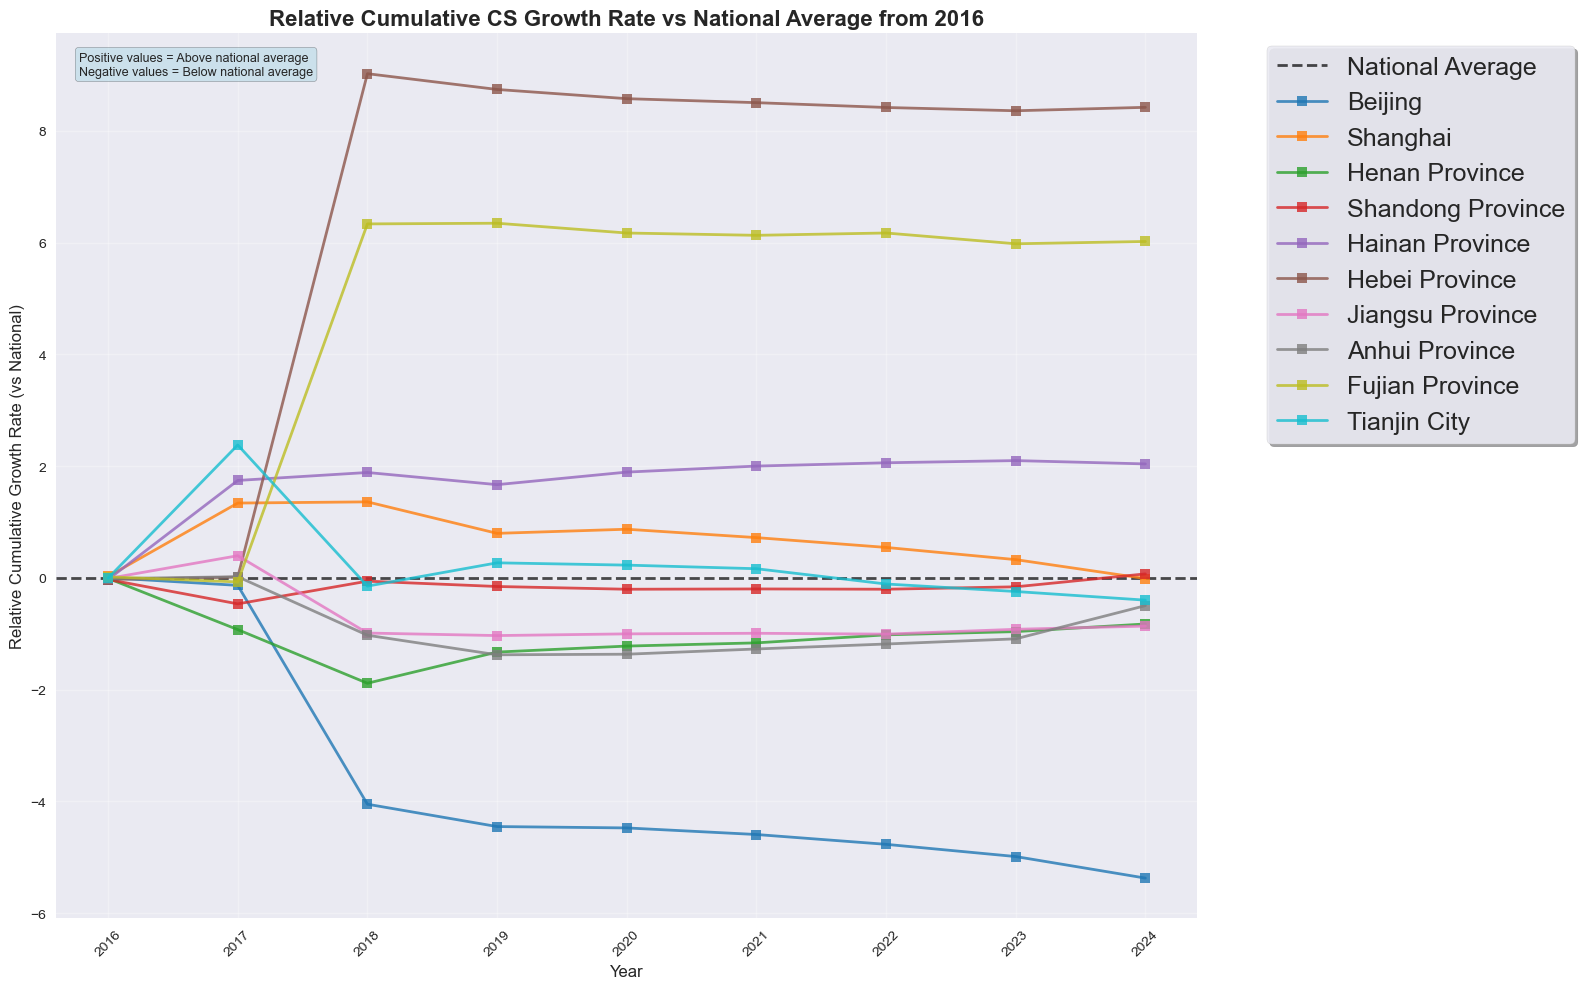

In [30]:
# Calculate relative cumulative growth rates (province - national average)
plt.figure(figsize=(16, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(cs_cumulative_data)))

# Plot zero reference line
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2, label='National Average')

# Plot provincial cumulative growth rates relative to national average
for i, (province, data) in enumerate(cs_cumulative_data.items()):
    # Calculate relative performance
    relative_rates = []
    for j, year in enumerate(data['years']):
        if year in cumulative_years:
            national_idx = cumulative_years.index(year)
            relative_rate = data['cumulative'][j] - cumulative_national[national_idx]
            relative_rates.append(relative_rate)
        else:
            relative_rates.append(0)  # Default if no national data
    
    plt.plot(data['years'], relative_rates, marker='s', linewidth=2, 
             label=province, alpha=0.8, color=colors[i])

plt.title(f'Relative Cumulative CS Growth Rate vs National Average from {start_year}', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Relative Cumulative Growth Rate (vs National)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18,
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(CS_data_set.keys())[sorted(CS_data_set.keys()).index(start_year):], rotation=45)

# Add explanation
plt.text(0.02, 0.98, 'Positive values = Above national average\nNegative values = Below national average', 
         transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()